In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from met_brewer import palettes
import met_brewer as met

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from scipy.cluster import hierarchy as shc
from scipy.spatial.distance import squareform, pdist

In [2]:
colors = palettes.met_brew(name="Hokusai1", n=20, brew_type="continuous")

In [3]:
df = pd.read_csv('./RoleCount.csv', index_col=0)
x = df['am']
y = df['cons']
s = df['total']

In [4]:
df2 = df.drop(['corporation', 'poele|metier','am', 'cons', 'total'], axis=1)

df_norm = StandardScaler().fit_transform(df2)
pca = PCA(n_components = 4)
decomposition = pca.fit_transform(df_norm)

decomposition = pd.DataFrame(data = decomposition, columns = ["mandat d'ammeistre avant 1444", "mandat d'ammeistre après 1444", "mandat de conseiller avant 1444", "mandat de conseiller après 1444"])
decomposition.head()

,mandat d'ammeistre avant 1444,mandat d'ammeistre après 1444,mandat de conseiller avant 1444,mandat de conseiller après 1444
0,0.747630,-1.242393,-0.786884,-1.361658
1,8.702201,-6.285259,-1.130967,2.860714
2,1.594746,-1.925716,-1.503028,-2.255466
3,1.312374,-1.697942,-1.264313,-1.957530
4,0.182887,-0.786844,-0.309454,-0.765787


In [5]:
print([round(i, 2) for i in pca.explained_variance_ratio_])

[0.48, 0.27, 0.16, 0.09]


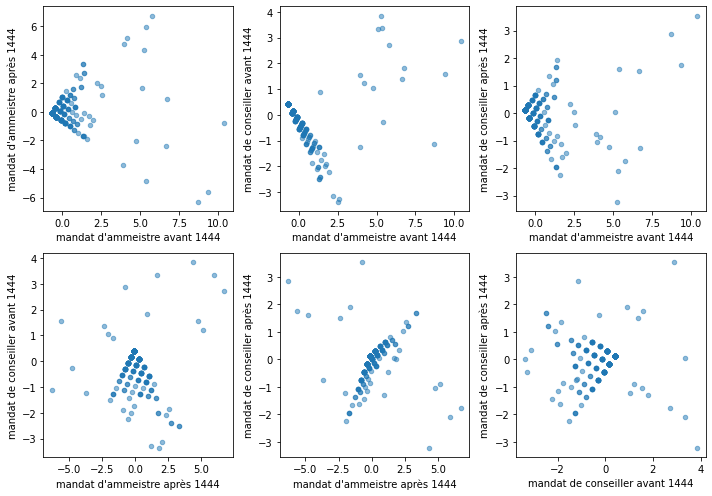

In [6]:
fig, axs = plt.subplots(2, 3, figsize = (10,7))

decomposition.plot(ax = axs[0,0], kind = "scatter", alpha = 0.5, x = "mandat d'ammeistre avant 1444",
                             y = "mandat d'ammeistre après 1444")
decomposition.plot(ax = axs[0,1], kind = "scatter", alpha = 0.5, x = "mandat d'ammeistre avant 1444",
                             y = "mandat de conseiller avant 1444")
decomposition.plot(ax = axs[0,2], kind = "scatter", alpha = 0.5, x = "mandat d'ammeistre avant 1444",
                             y = "mandat de conseiller après 1444")
decomposition.plot(ax = axs[1,0], kind = "scatter", alpha = 0.5, x = "mandat d'ammeistre après 1444",
                             y = "mandat de conseiller avant 1444")
decomposition.plot(ax = axs[1,1], kind = "scatter", alpha = 0.5, x = "mandat d'ammeistre après 1444",
                             y = "mandat de conseiller après 1444")
decomposition.plot(ax = axs[1,2], kind = "scatter", alpha = 0.5, x = "mandat de conseiller avant 1444",
                             y = "mandat de conseiller après 1444")

fig.tight_layout()
fig.savefig("./Images/partie_2/Reprepresentation_acp_2ax.svg", format='svg')

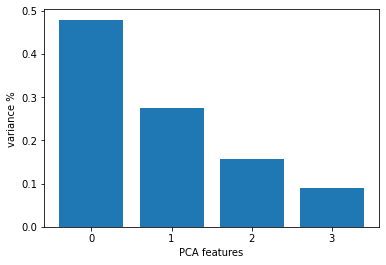

In [7]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.savefig('Images/partie_2/acp_variance.svg')

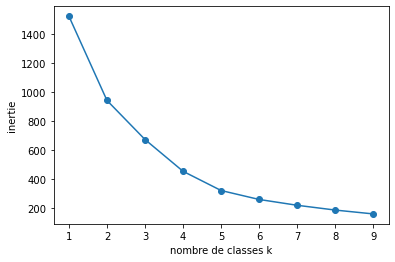

In [45]:
principalComponents = pca.fit_transform(df2)


ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    
    model.fit(decomposition.iloc[:,:4])
    
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('nombre de classes k')
plt.ylabel('inertie')
plt.xticks(ks)
plt.savefig('Images/partie_2/kmeans_classes.svg')

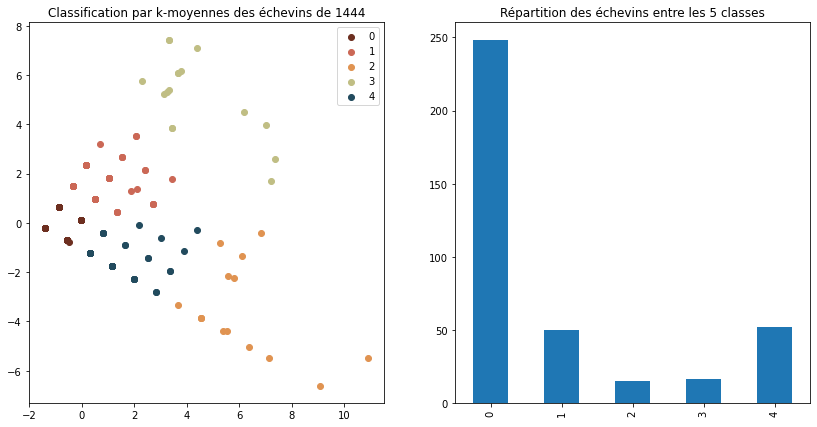

In [27]:
kmeans = KMeans(n_clusters= 5,random_state=0)

label = kmeans.fit_predict(principalComponents)

colorss = palettes.met_brew(name="Hokusai1", n=5, brew_type="continuous")

filtered_label0 = principalComponents[label == 0]
filtered_label1 = principalComponents[label == 1]
filtered_label2 = principalComponents[label == 2]
filtered_label3 = principalComponents[label == 3]
filtered_label4 = principalComponents[label == 4]


fig, axs = plt.subplots(1, 2, figsize = (14,7), sharex = False, sharey = False)

axs[0].scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = colorss[0])
axs[0].scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = colorss[1])
axs[0].scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = colorss[2])
axs[0].scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = colorss[3])
axs[0].scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = colorss[4])
axs[0].legend([0, 1, 2, 3, 4])

axs[0].title.set_text('Classification par k-moyennes des échevins de 1444')

df3 = pd.read_csv('./RoleCount.csv')
df3['cluster'] = label

axs[1] = df3['cluster'].value_counts().sort_index().plot.bar(x='classe', y='effectif')
axs[1].title.set_text('Répartition des échevins entre les 5 classes')

plt.savefig('Images/partie_2/kmeans_data.svg')

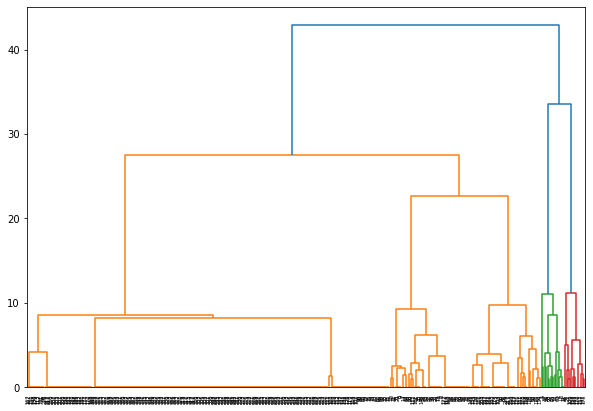

In [28]:
plt.figure(figsize=(10,7))
fig = shc.dendrogram(shc.linkage(df2, method='ward'))
plt.savefig('./Images/partie_2/dend_clusterEch1444.svg')

/home/hippolyte/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


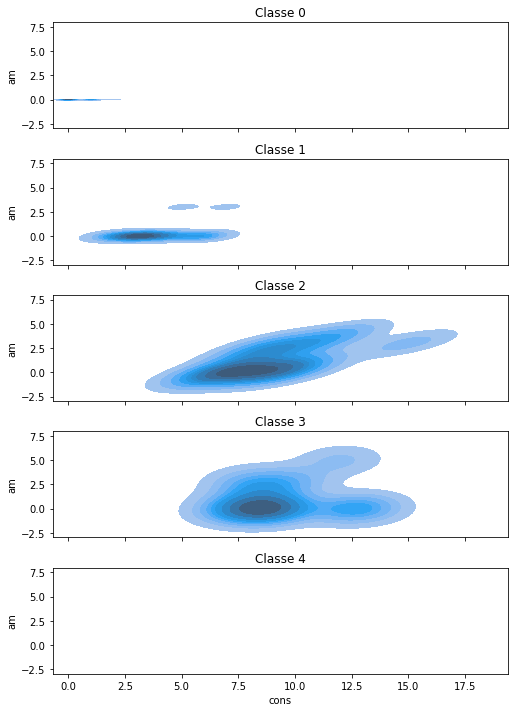

In [40]:
fig, axes = plt.subplots(5, figsize=(7, 10), sharex=True, sharey=True)


sns.kdeplot(ax = axes[0], data= df3.loc[df3['cluster'] == 0], x='cons', y = 'am', shade=True)

sns.kdeplot(ax = axes[1], data= df3.loc[df3['cluster'] == 1], x='cons', y = 'am', shade=True)

sns.kdeplot(ax = axes[2], data= df3.loc[df3['cluster'] == 2], x='cons', y = 'am', shade=True)

sns.kdeplot(ax = axes[3], data= df3.loc[df3['cluster'] == 3], x='cons', y = 'am', shade=True)

sns.kdeplot(ax = axes[4], data= df3.loc[df3['cluster'] == 4], x='cons', y = 'am', shade=True)

axes[0].title.set_text('Classe 0')
axes[1].title.set_text('Classe 1')
axes[2].title.set_text('Classe 2')
axes[3].title.set_text('Classe 3')
axes[4].title.set_text('Classe 4')

fig.tight_layout()

fig.savefig("./Images/partie_2/kde_clusters.svg", format="svg")

In [68]:
df3.loc[df3['cluster'] == 4]['cons'].value_counts()

2    19
3    16
4     7
5     5
6     3
7     1
8     1
Name: cons, dtype: int64

In [13]:
df_out = df3.replace(['group_05', 'group_06', 'group_07', 'group_08', 'group_09', 'group_10', 'group_11', 'group_12', 
                'group_13', 'group_14', 'group_15', 'group_16', 'group_17', 'group_18', 'group_19', 'group_20', 
                'group_21', 'group_22', 'group_23', 'group_24', 'group_25', 'group_26', 'group_27', 'group_28', 
                'group_29', 'group_30', 'group_31', 'group_32'],
               ['marchands', 'boulangers', 'bouchers', 
                'tonneliers', 'drapiers', 'tanneurs', 
                'cabaretiers', 'maçons', 'forgerons', 
                'tailleurs', 'bateliers', 'pelletiers', 
                'charpentiers', 'crieurs et mesureurs de vin', 
                'cordonniers', 'orfèvres', 'marchands de grains', 
                'jardiniers', 'pêcheurs', 'barbiers et baigneurs', 
                'sauniers', 'tisserands', 'gourmets et courtiers', 
                'charrons', 'regrattiers, cordiers et fruitiers', 
                'coltineurs de tonneaux', 'constructeurs de bateaux', 
                'huiliers meuniers et tondeurs de draps'])
df_out = df_out.replace(['group_39', 'group_43', 'group_41', 'group_42', 'group_44', 'group_46', 
                         'group_40', 'group_71', 'group_72', 'group_69', 'group_66', 'group_64',
                         'group_63', 'group_68', 'group_74', 'group_70', 'group_33', 'group_35',
                         'group_45', 'group_47', 'group_38', 'group_34', 'group_36', 'group_37',
                         'group_65', 'group_67', 'group_73', 'group_55'],
               ['zum Anker', 'zum Schiff', 'zum Hirtzhorn', 'zum Holtzapfel', 'zum Spiegel', 'zur Blume',
                'zum Friburger', 'orfèvres', 'peintres de boucliers', 'mesureurs de vin', 'crieurs de vin', 'barbiers',
                'baigneurs', 'huiliers', 'tondeurs de draps', 'meuniers', 'am Oberstaden', 'hinter Sankt-Kathrinen',
                'zum Teich', 'zur Waseneck', 'unter Wagner', 'an der Steinstraße', 'in der Krutenau', 'in der Ruprechtsau',
                'cordiers', 'fruitiers', 'regrattiers', 'carreleurs'])

df_out2 = pd.DataFrame(columns = ['id', 'corporation', 'poele|metier', "mandat d'ammeistre", 'mandat de conseiller', 'époque', 'total'])

for index, row in df_out.iterrows():
    dic = {}
    dic2 = {}
    dic['id'] = row['id']
    dic2['id'] = row['id']
    dic['corporation'] = row['corporation']
    dic2['corporation'] = row['corporation']
    dic['poele|metier'] = row['poele|metier']
    dic2['poele|metier'] = row['poele|metier']
    
    dic["mandat d'ammeistre"] = row['am_av_1444']
    dic['époque'] = "avant 1444"
    dic2["mandat d'ammeistre"] = row['am_ap_1444']
    dic2['époque'] = "après 1444"
    
    dic['mandat de conseiller'] = row['cons_av_1444']
    dic['époque'] = "avant 1444 (1444 inclus)"
    dic2['mandat de conseiller'] = row['cons_ap_1444']
    dic2['époque'] = "après 1444"
    
    dic['total'] = dic["mandat d'ammeistre"] + dic['mandat de conseiller']
    dic2['total'] = dic2["mandat d'ammeistre"] + dic2['mandat de conseiller']
    
    dic['cluster'] = int(row['cluster'])
    dic2['cluster'] = int(row['cluster'])
    
    
    df_out2 = df_out2.append(dic, ignore_index=True)
    df_out2 = df_out2.append(dic2, ignore_index=True)

In [14]:
df_out2['cluster'] = df_out2['cluster'].astype(int)
df_out2['total'] = df_out2['total'].astype('float')

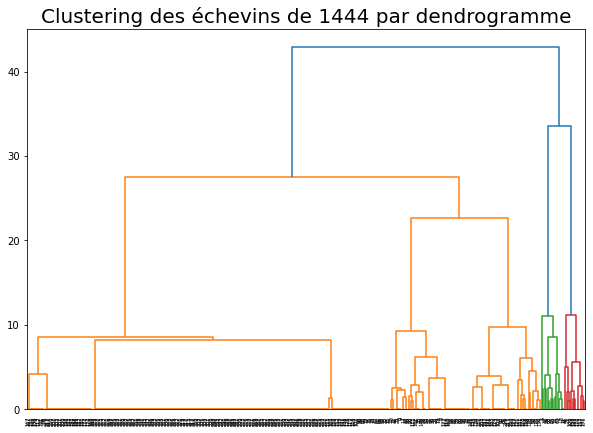

In [15]:
plt.figure(figsize=(10,7))
plt.title('Clustering des échevins de 1444 par dendrogramme', fontsize="20")
fig = shc.dendrogram(shc.linkage(df2, method='ward'))
plt.savefig('./Images/dend_clusterEch1444.svg', format='svg')

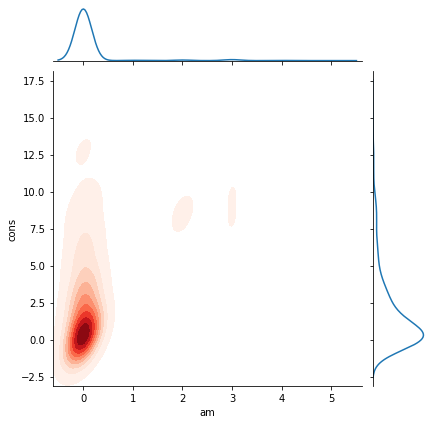

In [71]:
sns.jointplot(data = df, x="am", y="cons", cmap="Reds", kind='kde', shade=True)

plt.show()

In [76]:
df3.to_csv('../04-social_network_analysis/preprocessing/cluster_output.csv')

In [ ]:
fig = sns.stripplot(data = df3, x="am", y="cons", jitter=0.4, size=3)
#plt.title("Graphe Jitter du nombre de mandats de conseiller\net d'ammeistre par échevin en 1444", loc='center')
plt.tight_layout()
fig.set(xlabel="mandat d'ammeistre", ylabel="mandat de conseiller")
fig = fig.get_figure()
#fig.savefig("./Images/jitterplot_cluster.svg", format='svg')

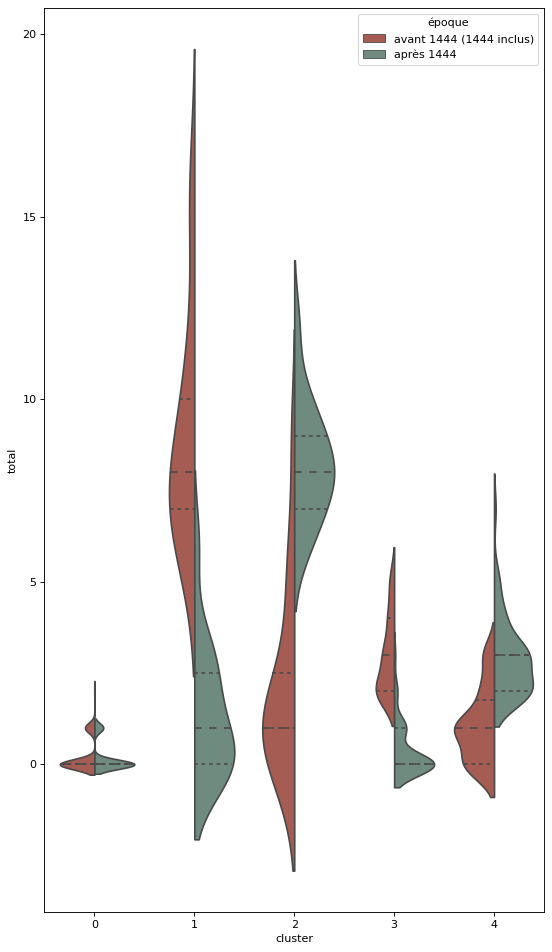

In [73]:
plt.figure(figsize=(7, 12), dpi=80)
violinplot_cons = sns.violinplot(y="total", x="cluster", hue="époque", data=df_out2, 
                                 inner='quartile', palette= [colors[3], colors[-3]], split=True)
#wrap_labels(violinplot_cons, 25)
#violinplot_cons.set_title("Diagramme en violon du nombre de mandats de conseiller et\nd'ammeistre des échevins de 1444 par cluster", loc='center', fontsize='15')
fig = violinplot_cons.get_figure()
fig.tight_layout()
#fig.savefig('./Images/violinplot_cluster.svg', format='svg')